/var/folders/mf/xy7kmx0106s8jfjb70n7l9t00000gn/T/ipykernel_46511/2574057518.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


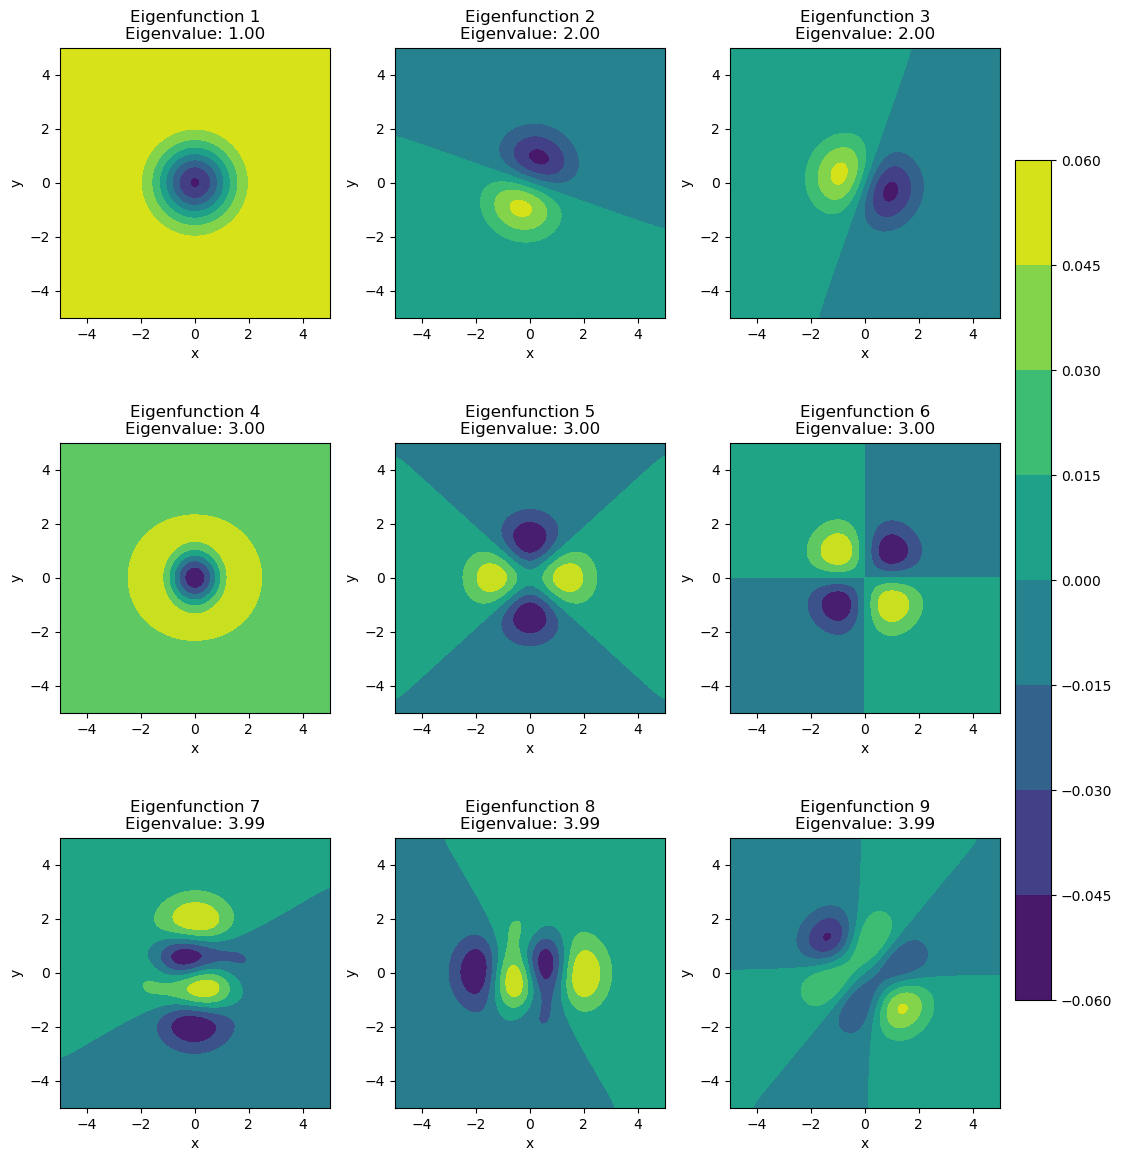

In [ ]:
import numpy as np
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

# Parameters
hbar = 1.0
m = 1.0
omega = 1.0
N = 100  # Grid points
L = 5.0  # Grid size

# Discretize space
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
dx = x[1] - x[0]

# Kinetic energy (discretized Laplacian for x and y)
T = - (hbar**2 / (2 * m)) * (diags([1, -2, 1], [-1, 0, 1], shape=(N, N)) / dx**2)

# Potential energy
X, Y = np.meshgrid(x, y)
V = 0.5 * m * omega**2 * (X**2 + Y**2)
V = diags(V.flatten(), 0)

# Hamiltonian
I = eye(N)
H = kron(I, T) + kron(T, I) + V

# Solve for eigenvalues and eigenvectors
num_eigenvalues = 9  # Plot first 9 eigenfunctions
eigvals, eigvecs = eigsh(H, k=num_eigenvalues, which='SM')

# Reshape eigenvectors to 2D grid
eigenfunctions = [eigvecs[:, i].reshape(N, N) for i in range(num_eigenvalues)]

# Plot the first 9 eigenfunctions in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

for i in range(num_eigenvalues):
    ax = axes[i]
    c = ax.contourf(X, Y, eigenfunctions[i], cmap='viridis')
    ax.set_title(f'Eigenfunction {i+1}\nEigenvalue: {eigvals[i]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')  # Ensure the plot is square

# Add colorbar separately to avoid issues with tight_layout
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
fig.colorbar(c, cax=cbar_ax)

# Remove any unused subplots
for i in range(num_eigenvalues, 9):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
